In [1]:
!pip install tensorflow==2.17.0

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2024-09-26 18:20:32.287141: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-26 18:20:32.287931: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-26 18:20:32.291860: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-26 18:20:32.303696: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 18:20:32.323195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils 

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results    

In [5]:
def draw_landmark(image, results): 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


In [7]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        image, results = mediapipe_detection(frame, holistic)
        #print(results)

        draw_styled_landmarks(image, results)
        
        cv2.imshow('OpenCV Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


I0000 00:00:1727367634.924751   10581 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1727367634.932474   10683 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.1.3-arch1.1), renderer: Mesa Intel(R) Graphics (RPL-U)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1727367635.053892   10667 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727367635.092901   10678 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727367635.094971   10678 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727367635.096690   10672 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inferen

In [8]:
#len(results.left_hand_landmarks.landmark)

mp_holistic.POSE_CONNECTIONS

In [9]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [10]:
draw_landmark(frame, results)

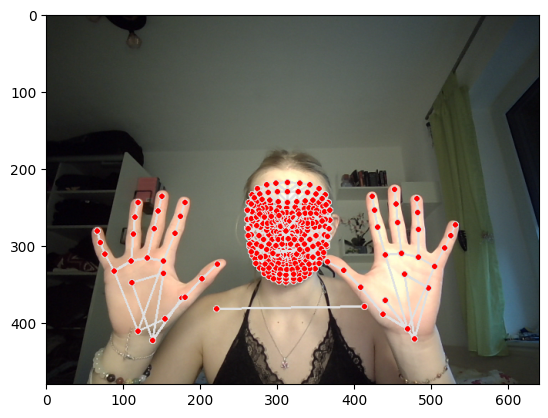

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
for res in results.pose_landmarks.landmark: 
   test = np.array([res.x, res.y, res.z, res.visibility])

In [14]:
test

array([ 4.14040715e-01,  2.52554321e+00, -1.64352506e-01,  2.61669891e-04])

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose

[array([ 0.4874514 ,  0.58707595, -0.82909375,  0.99998808]),
 array([ 0.51308793,  0.54076922, -0.78643215,  0.99997908]),
 array([ 0.52639854,  0.53957361, -0.78617537,  0.99997967]),
 array([ 0.53672814,  0.53898585, -0.78544199,  0.99997759]),
 array([ 0.47211266,  0.5458076 , -0.76885414,  0.99997681]),
 array([ 0.4575738 ,  0.54731774, -0.76855183,  0.99997491]),
 array([ 0.44363302,  0.54949874, -0.76859176,  0.99997264]),
 array([ 0.5601536 ,  0.55953306, -0.46167135,  0.99998021]),
 array([ 0.42798299,  0.57183653, -0.3751716 ,  0.99997824]),
 array([ 0.51457655,  0.63682586, -0.70844316,  0.99998343]),
 array([ 0.45999217,  0.64669526, -0.68617004,  0.9999826 ]),
 array([ 0.64551109,  0.79080433, -0.26077169,  0.99982363]),
 array([ 0.34658793,  0.79752564, -0.14724071,  0.99963266]),
 array([ 0.77742887,  1.05480802, -0.77673984,  0.90156662]),
 array([ 0.15778178,  1.12448871, -0.61079407,  0.92539698]),
 array([ 0.74768698,  0.87890273, -1.405182  ,  0.98826152]),
 array([

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [18]:
res.y

2.525543212890625

In [19]:
lh

array([ 7.34320223e-01,  8.51700008e-01,  2.79512420e-07,  6.83112025e-01,
        8.11948180e-01, -1.36602968e-02,  6.38704181e-01,  7.38358676e-01,
       -1.64419543e-02,  6.03628635e-01,  6.92003131e-01, -1.95177570e-02,
        5.71379185e-01,  6.70119762e-01, -2.25120019e-02,  6.87552989e-01,
        6.51799679e-01, -9.71609144e-04,  6.72535300e-01,  5.76370001e-01,
       -1.02364644e-02,  6.65672898e-01,  5.30650556e-01, -1.97005197e-02,
        6.61817908e-01,  4.93417799e-01, -2.77353562e-02,  7.20739365e-01,
        6.45872295e-01, -5.01303468e-03,  7.13367760e-01,  5.63645780e-01,
       -1.16432533e-02,  7.09694266e-01,  5.12687564e-01, -2.02955548e-02,
        7.06395209e-01,  4.73207593e-01, -2.74632405e-02,  7.54878044e-01,
        6.56720698e-01, -1.25449225e-02,  7.55617857e-01,  5.81582069e-01,
       -2.27855425e-02,  7.54616022e-01,  5.36687970e-01, -3.20971943e-02,
        7.51982450e-01,  4.99482036e-01, -3.92619558e-02,  7.88060904e-01,
        6.81472600e-01, -

In [20]:
pose

array([ 4.87451404e-01,  5.87075949e-01, -8.29093754e-01,  9.99988079e-01,
        5.13087928e-01,  5.40769219e-01, -7.86432147e-01,  9.99979079e-01,
        5.26398540e-01,  5.39573610e-01, -7.86175370e-01,  9.99979675e-01,
        5.36728144e-01,  5.38985848e-01, -7.85441995e-01,  9.99977589e-01,
        4.72112656e-01,  5.45807600e-01, -7.68854141e-01,  9.99976814e-01,
        4.57573801e-01,  5.47317743e-01, -7.68551826e-01,  9.99974906e-01,
        4.43633020e-01,  5.49498737e-01, -7.68591762e-01,  9.99972641e-01,
        5.60153604e-01,  5.59533060e-01, -4.61671352e-01,  9.99980211e-01,
        4.27982986e-01,  5.71836531e-01, -3.75171602e-01,  9.99978244e-01,
        5.14576554e-01,  6.36825860e-01, -7.08443165e-01,  9.99983430e-01,
        4.59992170e-01,  6.46695256e-01, -6.86170042e-01,  9.99982595e-01,
        6.45511091e-01,  7.90804327e-01, -2.60771692e-01,  9.99823630e-01,
        3.46587926e-01,  7.97525644e-01, -1.47240713e-01,  9.99632657e-01,
        7.77428865e-01,  

In [21]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [22]:
extract_keypoints(results)

array([ 0.4874514 ,  0.58707595, -0.82909375, ...,  0.10437834,
        0.58572358, -0.05092398])

In [61]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['A', 'B', 'C', 'D', 'E', 'F'])
no_sequences = 30
#'A', 'B', 'C', 'D', 'E', 'F' , 'G', 'H', 'I' ,'J', 'K', 'L', ,'M', 'N', 'O'  'P', 'Q', 'R', 'S', 'T', 'U','V', 'W', 'X'   
sequence_length = 30

In [24]:
#keypoints

In [62]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [63]:
label_map = {label:num for num, label in enumerate(actions)}

In [64]:
label_map

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}

In [65]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [66]:
np.array(sequences).shape

(180, 30, 1662)

In [67]:
np.array(labels).shape

(180,)

In [68]:
X = np.array(sequences)

In [69]:
X.shape

(180, 30, 1662)

In [70]:
y = to_categorical(labels).astype(int)

In [71]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [73]:
y_train.shape

(171, 6)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Bidirectional

In [38]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [39]:
model1 = Sequential()
model1.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model1.add(LSTM(128, return_sequences=True, activation='relu'))
model1.add(LSTM(64, return_sequences=False, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(actions.shape[0], activation='softmax'))

I0000 00:00:1727367645.879840   10581 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-26 18:20:45.882793: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/sophie/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [94]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(Dropout(0.2))  # Add dropout after LSTM layers
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [124]:
from tensorflow.keras.layers import Bidirectional

model2 = Sequential()
# Use Bidirectional LSTM in the first or second LSTM layer
model2.add(Bidirectional(LSTM(64, return_sequences=True, activation='tanh'), input_shape=(30, 1662)))
model2.add(Dropout(0.2))  # Dropout for regularization
model2.add(Bidirectional(LSTM(128, return_sequences=True, activation='tanh')))  # You can add another Bidirectional layer
model2.add(Dropout(0.2))
model2.add(LSTM(64, return_sequences=False, activation='tanh'))  # Final LSTM without bidirectional
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(actions.shape[0], activation='softmax'))

optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)  # Adjust learning rate if needed
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


/home/sophie/.local/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)  # Try a smaller learning rate if the model struggles
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [125]:
model2.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.1865 - loss: 1.7873
Epoch 2/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.1642 - loss: 1.7901
Epoch 3/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.1865 - loss: 1.7809
Epoch 4/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.1974 - loss: 1.7613
Epoch 5/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.2112 - loss: 1.7269
Epoch 6/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.2377 - loss: 1.7236
Epoch 7/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.2322 - loss: 1.6832
Epoch 8/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.1721 - loss: 1.6758
Epoch 9/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.2705 - loss: 1.6113
Epoch 10/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.3030 - loss: 1.5961
Epoch 11/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.2796 - loss: 1.5722
Epoch 12/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step

KeyboardInterrupt: 

In [126]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,675 (2.28 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

In [128]:
res = model2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


In [100]:
actions[np.argmax(res[2])]

'F'

In [ ]:
#actions[np.argmax(y_test[2])]model.save('action.h5')

In [120]:
model.save('actionABCDEF2.h5')

In [121]:
model.save('actionADCDEF2.keras')

In [ ]:
#del model

In [78]:
model.load_weights('actionABCDEF.h5')

In [101]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [129]:
yhat = model2.predict(X_train)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [130]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
ytrue

In [ ]:
yhat

In [87]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[135,   7],
        [  1,  28]],

       [[142,   1],
        [  7,  21]],

       [[144,   0],
        [  1,  26]],

       [[134,   8],
        [  1,  28]],

       [[124,  18],
        [  6,  23]],

       [[142,   0],
        [ 18,  11]]])

In [132]:
accuracy_score(ytrue, yhat)

0.6432748538011696

In [122]:
threshold = 0.6

In [111]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)] * 2  # Repeat colors to match 6 actions
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [55]:


plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))



TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [108]:
actions

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype='<U1')

In [133]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1727370391.881383   10581 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1727370391.884517   64491 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.1.3-arch1.1), renderer: Mesa Intel(R) Graphics (RPL-U)
W0000 00:00:1727370391.991062   64478 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727370392.021879   64488 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727370392.023142   64481 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727370392.023785   64485 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
import cv2
import numpy as np
import time

sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)  # Open camera

# Set MediaPipe model
with mp_holistic.Holistic(min_detection_confidence=0.3, min_tracking_confidence=0.3) as holistic:
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture image from camera.")
            break

        frame_count += 1

        # Only process every 5th frame to reduce workload
        if frame_count % 5 != 0:
            continue

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        if results is None:
            print("No detections")
            continue
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Keypoints extraction
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep only last 30 frames

        # Prediction logic
        if len(sequence) == 30:
            start_time = time.time()
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(f"Prediction time: {time.time() - start_time}")
            print(actions[np.argmax(res)])

            # Visualization logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

        # Show result on screen
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
np.expand_dims(X_test[0], axis=0)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))